

## Deep Autoencoder with Batch Normalization and Dropout layers



### Reference

#### https://colab.research.google.com/drive/1R_RxoOwi4Y9OMmK8PrPyKWRJba8KBsaI?usp=sharing
#### https://www.youtube.com/watch?v=9zKuYvjFFS8&t=528s
#### https://www.youtube.com/watch?v=D9HjlqIrB-c&t=134s

In [ ]:
# Importing necessary libraries

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing import sequence
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Setting random seed value 

tf.random.set_seed(42)

### Mounting Google Drive

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the dataset from keras.datasets import cifar10.

In [ ]:
from keras.datasets import cifar10

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


### Data Preprocessing

In [ ]:
# Checking the shape of the images

X_train[1].shape

(32, 32, 3)

#### Visualizing the input images

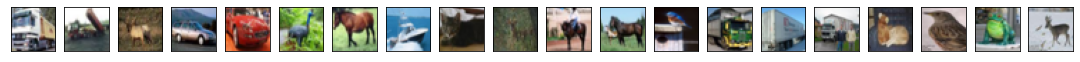

In [ ]:
# Plotting 20 images to visualize

plt.figure(figsize=(20, 5))
for i in range(1, 21):
    # Display original
    ax = plt.subplot(1, 21, i)
    plt.imshow(X_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
# Scaling the images to have values between 0 and 1

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [ ]:
# Reshaping the inputimages into vectors (3072-dim vector)

X_train = X_train.reshape((len(X_train), 32*32*3))
X_test = X_test.reshape((len(X_test), 32*32*3))

### Creating a Deep Autoencoder with BatchNormalization and Dropout layers

In [59]:
input_dim = 32*32*3
latent_dim = 96

# Input Layer

input_vector = Input(shape=(input_dim,))

# Encoder Layer ( This layer would compress the input vector in lower dimension )

encoded_layer_1 = Dropout(0.2)(input_vector)
encoded_layer_2 = Dense(1536, activation='relu')(encoded_layer_1)
encoded_layer_3 = BatchNormalization()(encoded_layer_2)
encoded_layer_4 = Dropout(0.2)(encoded_layer_3)
encoded_layer_5 = Dense(768, activation='relu')(encoded_layer_4)
encoded_layer_6 = BatchNormalization()(encoded_layer_5)
encoded_layer_7 = Dense(384, activation='relu')(encoded_layer_6)
encoded_layer_8 = BatchNormalization()(encoded_layer_7)
encoded_layer_9 = Dropout(0.2)(encoded_layer_8)
encoded_layer_10 = Dense(192, activation='relu')(encoded_layer_9)
encoded_layer_11 = BatchNormalization()(encoded_layer_10)

# Latent Layer ( Compressed layer)

latent_layer = Dense(latent_dim, activation='relu')(encoded_layer_11)

# Decoder Layer ( this layer will decompress the image back to its original dimension )

decoded_layer_1 = Dense(192, activation='relu')(latent_layer)
decoded_layer_2 = BatchNormalization()(decoded_layer_1)
decoded_layer_3 = Dense(384, activation='relu')(decoded_layer_2)
decoded_layer_4 = BatchNormalization()(decoded_layer_3)
decoded_layer_5 = Dense(768, activation='relu')(decoded_layer_4)
decoded_layer_6 = BatchNormalization()(decoded_layer_5)
decoded_layer_7 = Dense(1536, activation='relu')(decoded_layer_6)
decoded_layer_8 = BatchNormalization()(decoded_layer_7)

# Output Layer 

output_vector = Dense(input_dim, activation='sigmoid')(decoded_layer_8)

# Results using Binary Cross Entropy as Loss Function

In [60]:
# Creating the Model

autoencoder = Model(input_vector, output_vector)

# Compiling the Model

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')



In [61]:
# Model Summary

autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 3072)              0         
_________________________________________________________________
dense_78 (Dense)             (None, 1536)              4720128   
_________________________________________________________________
batch_normalization_63 (Batc (None, 1536)              6144      
_________________________________________________________________
dropout_16 (Dropout)         (None, 1536)              0         
_________________________________________________________________
dense_79 (Dense)             (None, 768)               1180416   
_________________________________________________________________
batch_normalization_64 (Batc (None, 768)               3072

In [62]:
# Defining the batch size and epochs

batch = 256
e = 100

In [63]:
# Training the model

history = autoencoder.fit(X_train, X_train, epochs=e, batch_size=batch, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/100
196/196 [==============================] - 5s 17ms/step - loss: 0.6193 - val_loss: 0.6699
Epoch 2/100
196/196 [==============================] - 3s 15ms/step - loss: 0.6072 - val_loss: 0.6429
Epoch 3/100
196/196 [==============================] - 3s 16ms/step - loss: 0.6061 - val_loss: 0.6523
Epoch 4/100
196/196 [==============================] - 3s 16ms/step - loss: 0.6048 - val_loss: 0.6786
Epoch 5/100
196/196 [==============================] - 3s 16ms/step - loss: 0.6034 - val_loss: 0.6148
Epoch 6/100
196/196 [==============================] - 3s 16ms/step - loss: 0.6022 - val_loss: 0.6806
Epoch 7/100
196/196 [==============================] - 3s 15ms/step - loss: 0.6014 - val_loss: 0.6058
Epoch 8/100
196/196 [==============================] - 3s 16ms/step - loss: 0.6008 - val_loss: 0.6246
Epoch 9/100
196/196 [==============================] - 3s 15ms/step - loss: 0.6000 - val_loss: 0.6026
Epoch 10/100
196/196 [==============================] - 3s 16ms/step - loss: 0.600

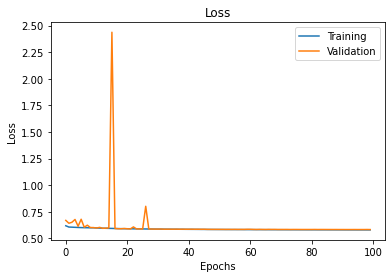

In [64]:
# Visualizing the Loss Function

epoch_range = range(0,e)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


In [65]:
# Recontructing the images 

recon_imgs = autoencoder.predict(X_test)

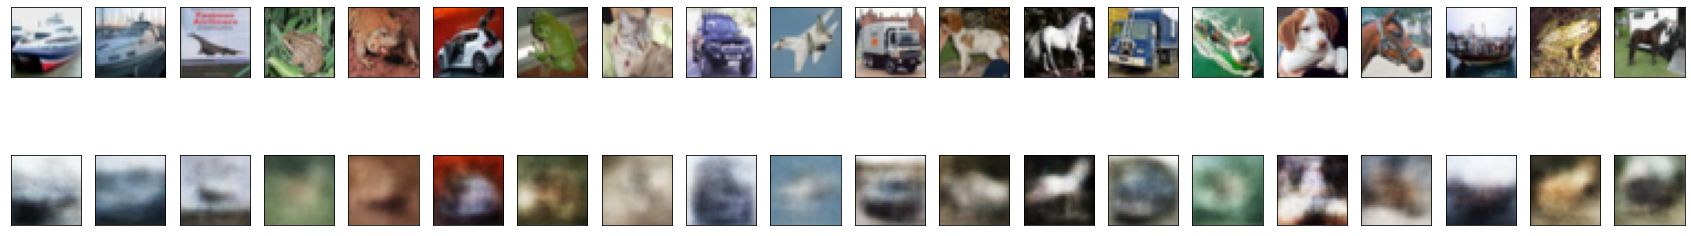

In [66]:
# Visualize reconstructed images

plt.figure(figsize=(30, 5))
for i in range(1, 20 + 1):
    
    # Display original
    ax = plt.subplot(2, 20, i)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, 20, i + 20)
    plt.imshow(recon_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Results using Mean Squarrred Error as Loss Function

In [68]:
# Creating the Model

autoencoder = Model(input_vector, output_vector)

# Compiling the Model

autoencoder.compile(loss='mean_squared_error', optimizer='adam')

In [69]:
# Model Summary

autoencoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 3072)              0         
_________________________________________________________________
dense_78 (Dense)             (None, 1536)              4720128   
_________________________________________________________________
batch_normalization_63 (Batc (None, 1536)              6144      
_________________________________________________________________
dropout_16 (Dropout)         (None, 1536)              0         
_________________________________________________________________
dense_79 (Dense)             (None, 768)               1180416   
_________________________________________________________________
batch_normalization_64 (Batc (None, 768)               3072

In [70]:
# Defining the batch size and epochs

batch = 256
e = 100

In [71]:
# Training the model

history = autoencoder.fit(X_train, X_train, epochs=e, batch_size=batch, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/100
196/196 [==============================] - 5s 17ms/step - loss: 0.0131 - val_loss: 0.0143
Epoch 2/100
196/196 [==============================] - 3s 16ms/step - loss: 0.0131 - val_loss: 0.0143
Epoch 3/100
196/196 [==============================] - 3s 16ms/step - loss: 0.0131 - val_loss: 0.0143
Epoch 4/100
196/196 [==============================] - 3s 16ms/step - loss: 0.0131 - val_loss: 0.0144
Epoch 5/100
196/196 [==============================] - 3s 15ms/step - loss: 0.0130 - val_loss: 0.0143
Epoch 6/100
196/196 [==============================] - 3s 15ms/step - loss: 0.0130 - val_loss: 0.0142
Epoch 7/100
196/196 [==============================] - 3s 15ms/step - loss: 0.0130 - val_loss: 0.0142
Epoch 8/100
196/196 [==============================] - 3s 15ms/step - loss: 0.0130 - val_loss: 0.0142
Epoch 9/100
196/196 [==============================] - 3s 15ms/step - loss: 0.0130 - val_loss: 0.0143
Epoch 10/100
196/196 [==============================] - 3s 15ms/step - loss: 0.013

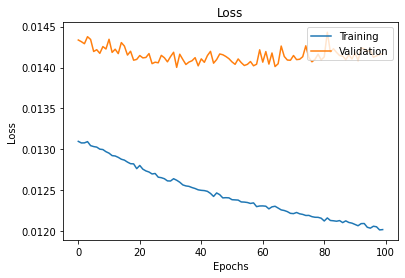

In [72]:
# Visualizing the Loss Function

epoch_range = range(0,e)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [73]:
# Reconstructing the images

recon_imgs = autoencoder.predict(X_test)

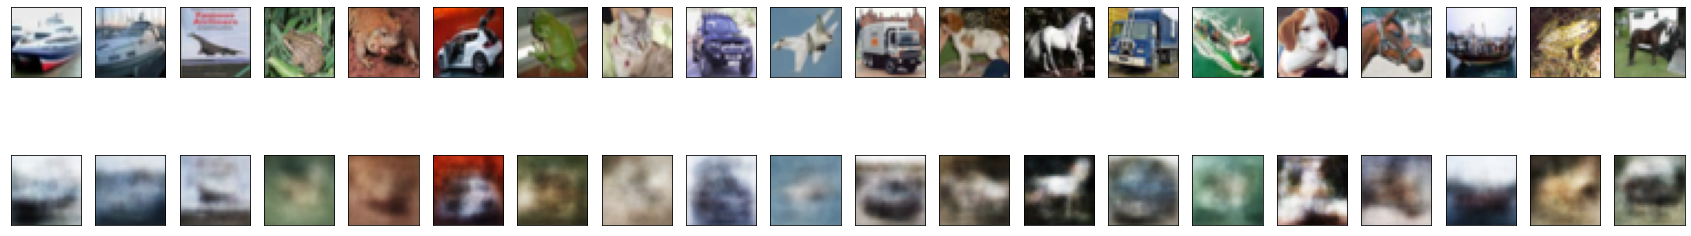

In [74]:
# Visualize reconstructed images

plt.figure(figsize=(30, 5))
for i in range(1, 20 + 1):
    
    # Display original images 
    ax = plt.subplot(2, 20, i)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images 
    ax = plt.subplot(2, 20, i + 20)
    plt.imshow(recon_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Summary

This project is to build a deep autoencoder with batch normalization and dropout layer. The dataset used for this assignment is 'cifar10'. First the dataset is imported from keras libraries. The images size is 32 by 32 by 3. The first 20 images are visualized. The images are then rescaled to have values between 0 and 1. The images were then converted to a vector of size 3072. An eleven layered deep autoencoder was created with fully connected dense layers, batchnormalized layer and dropout layers. The neuron architecture is 1536->768->384->192->96->192->384->768->1536. It was observed that compressing beyond latent layer of 96 units would produce reconstructed image which is distorted beyond recognition (although the images produced by 96 latent images are also blurred)
Hyperparameter Tuning.
------------------------------------------------------------
Depth of the Network - Increasing the depth of the network and compressing the latent layer beyond 96 units hampered the performance of the network. Decreasing the depth and increasing the bottleneck size would produce better results. 96 units was the optimal width beyond which the reconstruction went total blurr

Loss Function : The experiment was started with 'binary cross entropy' as the loss function. For all the fine tuning of other parameters, the loss function was in the range of 0.60 and 0.58. When the loss function was changed to 'mean squarred error', a significant improvement was observed as the loss function was within the range of 0.013 to 0.012. The reconstruction using 'mean squarred error' was somewhat better than binary cross entropy ( Though it is difficult to visually observe )

Epoch - It was observed that the model will converge at about 100

Batch Size - The experiment was performed in the range of 32 - 256 batch size for for both loss function. Best results were obtained for 128/256 batch size.